In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
tf.__version__

'1.12.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = (x_train / 255).reshape(x_train.shape[0], 28, 28, 1)
x_test = (x_test / 255).reshape(x_test.shape[0], 28, 28, 1)

In [16]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

model.fit(
    x_train,
    y_train,
    epochs=5
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                36928     
__________

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 3s 262us/step
Test accuracy: 0.9914
Test loss: 0.03000652879036643


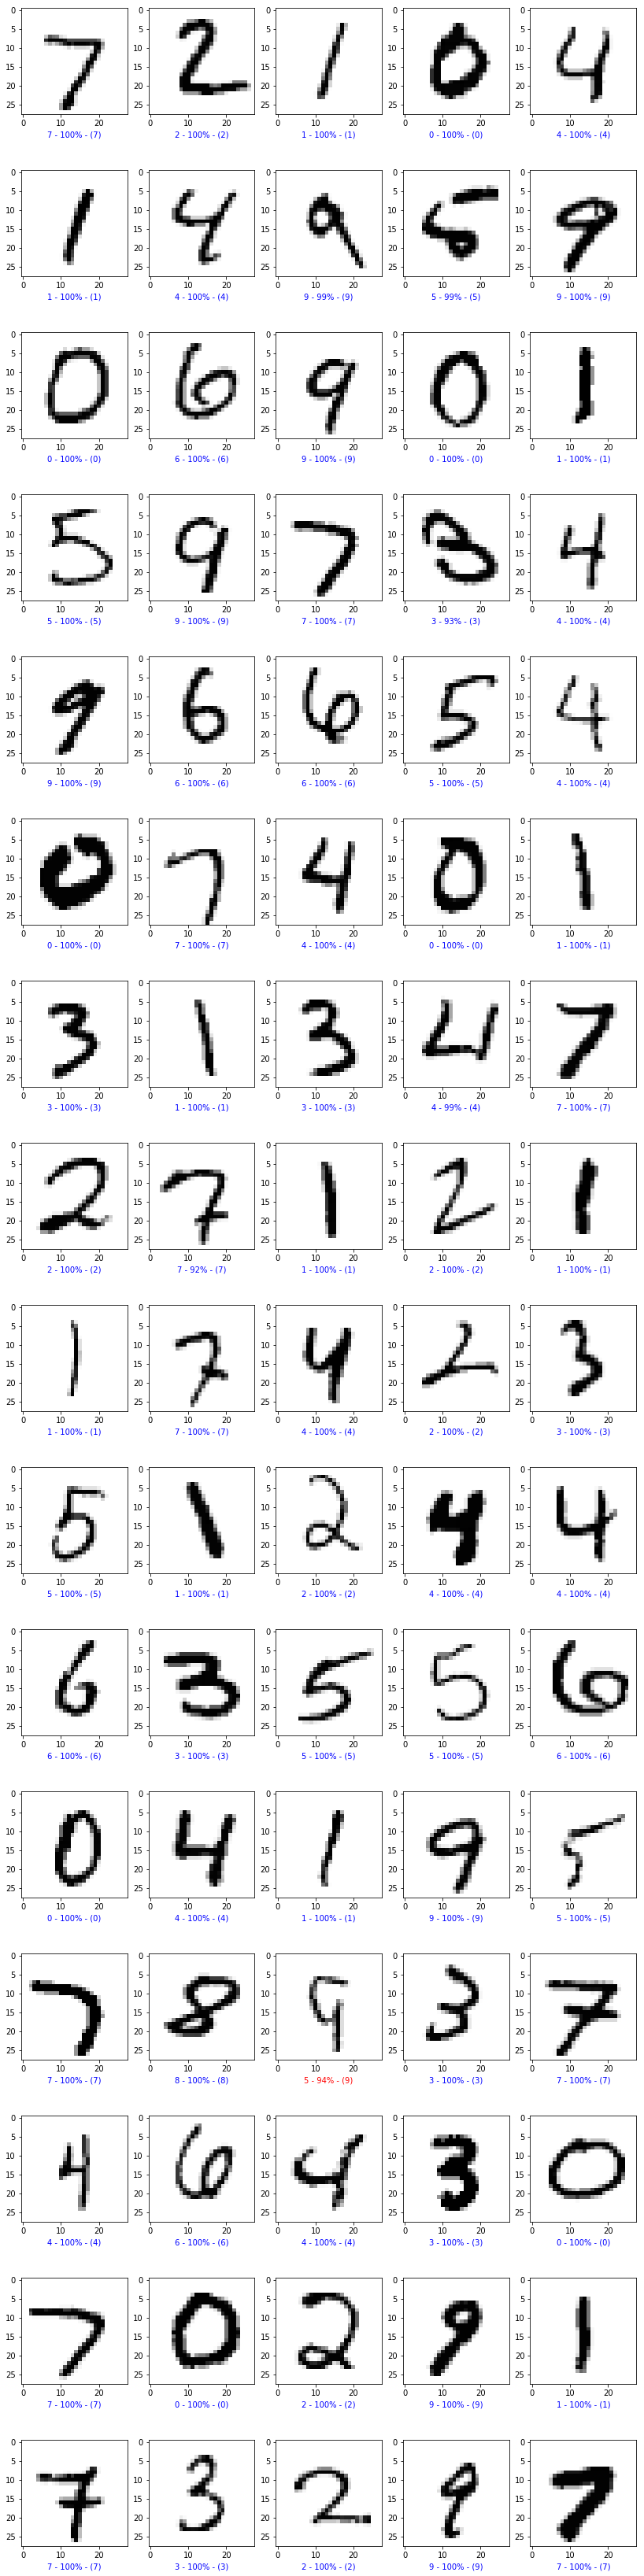

In [18]:
plt.figure(figsize=(14, 60))
predictions = model.predict(x_test[:80])
for i in range(80):
    plt.subplot(16, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} - {:2.0f}% - ({})".format(predicted_label,
                                        100*np.max(predictions[i]),
                                        true_label),
              color=color)
plt.show()